### Import Required Libraries-

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

### Load and Preprocess Data-

In [7]:
data_dir = "C:/Users/chokh/Downloads/Dataset"
classes = ["with_mask", "without_mask", "mask_weared_incorrect"]
img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=classes
)

Found 8982 images belonging to 3 classes.


### Build and Train the Model-

In [8]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

head_model = base_model.output
head_model = AveragePooling2D(pool_size=(7, 7))(head_model)
head_model = Flatten(name='flatten')(head_model)
head_model = Dense(128, activation='relu')(head_model)
head_model = Dropout(0.5)(head_model)
head_model = Dense(len(classes), activation='softmax')(head_model)

model = Model(inputs=base_model.input, outputs=head_model)

for layer in base_model.layers:
    layer.trainable = False

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20
)

Epoch 1/20
281/281 [==============================] - 448s 2s/step - loss: 0.5181 - accuracy: 0.7926
Epoch 2/20
281/281 [==============================] - 442s 2s/step - loss: 0.3105 - accuracy: 0.8832
Epoch 3/20
281/281 [==============================] - 451s 2s/step - loss: 0.2580 - accuracy: 0.9047
Epoch 4/20
281/281 [==============================] - 437s 2s/step - loss: 0.2294 - accuracy: 0.9179
Epoch 5/20
281/281 [==============================] - 441s 2s/step - loss: 0.2114 - accuracy: 0.9203
Epoch 6/20
281/281 [==============================] - 434s 2s/step - loss: 0.2047 - accuracy: 0.9250
Epoch 7/20
281/281 [==============================] - 444s 2s/step - loss: 0.1826 - accuracy: 0.9324
Epoch 8/20
281/281 [==============================] - 444s 2s/step - loss: 0.1817 - accuracy: 0.9351
Epoch 9/20
281/281 [==============================] - 459s 2s/step - loss: 0.1746 - accuracy: 0.9361
Epoch 10/20
281/281 [==============================] - 460s 2s/step - loss: 0.1692 - accura

### Evaluate the Model-

In [9]:
target_names = ["With Mask", "Without Mask", "Mask Worn Incorrectly"]

print("[INFO] evaluating network...")
predictions = model.predict(train_generator, steps=len(train_generator))
predictions = np.argmax(predictions, axis=1)

print(classification_report(train_generator.classes, predictions, target_names=target_names))

[INFO] evaluating network...
281/281 [==============================] - 331s 1s/step
                       precision    recall  f1-score   support

            With Mask       0.34      0.34      0.34      2994
         Without Mask       0.33      0.33      0.33      2994
Mask Worn Incorrectly       0.33      0.34      0.34      2994

             accuracy                           0.34      8982
            macro avg       0.34      0.34      0.34      8982
         weighted avg       0.34      0.34      0.34      8982



### Visualize Sample Images-

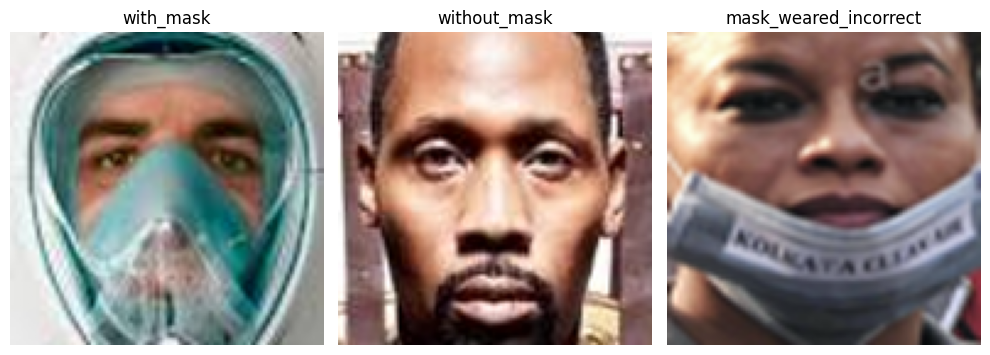

In [10]:
sample_images = []

for class_name in classes:
    class_path = os.path.join(data_dir, class_name)
    image_list = os.listdir(class_path)
    sample_image = os.path.join(class_path, image_list[0])
    sample_images.append(sample_image)

plt.figure(figsize=(10, 6))
for i, sample_image in enumerate(sample_images, 1):
    img = plt.imread(sample_image)
    plt.subplot(1, 3, i)
    plt.imshow(img)
    plt.title(classes[i - 1])
    plt.axis('off')

plt.tight_layout()
plt.show()